In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import math

def plot_scenario_data(df, name):
    df.columns = ['Unnamed: 0', 'Heuristic Stress', 'Predictability-Control Stress', 'Value Stress', 'Control Stress', 'Predictability stress', 'state_name','end_state']
    df = df.drop(labels=["Unnamed: 0", "end_state"], axis=1) # 'Heuristic_Stress's

    #yerr=df.std()
    #print(df)
    #print(yerr)

    df_means = df.groupby("state_name").mean() #.aggregate(['mean', 'std'])
    df_var = df.groupby("state_name").var()

    #print(df_means)
    #df = df[df.state_name != "preflight"]
    try:
        df_means = df_means.drop(["preflight", "landed", "crashed"]) #"crashed" is not removed for now use it as "max stress"
    except KeyError:
        df_means = df_means.drop(["preflight"]) 
    fig = plt.figure(figsize=(18,9))
    ax = df_means.plot(kind = "bar", figsize=(14,6), title=name, yerr=2*df_var, align='center')
    ax.set(xlabel="Flight state", ylabel="Estimated stress level")
    ax.set_ylim(0, 1)
    #ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    ax.grid(visible=True, axis='y', linestyle='-.')

    plt.show()
    return df



In [6]:
# Extra tool needed to do the box plots
def plot_scenario_data_box(df, name):
    df.columns = ['Unnamed: 0', 'Heuristic Stress', 'Predictability-Control Stress', 'Value Stress', 'Control Stress', 'Predictability stress', 'state_name','end_state']
    df = df.drop(labels=["Unnamed: 0", "end_state"], axis=1) # 'Heuristic_Stress's


    labels = ['Heuristic Stress', 'Predictability-Control Stress', 'Value Stress', 'Control Stress', 'Predictability stress']
    df = df.groupby("state_name").mean()

    
    #df = df[df.state_name != "preflight"]
    try:
        df = df.drop(["preflight", "landed", "crashed"]) #"crashed" is not removed for now use it as "max stress"
    except KeyError:
        df = df.drop(["preflight"]) 
    fig = plt.figure(figsize=(18,9))
    #ax = df.plot(figsize=(14,6), title=name)
    ax = plt.gca()
    bplot1 = ax.boxplot(df,
                        #notch=True,  # notch shape
                        vert=True,  # vertical box alignment
                        patch_artist=True,  # fill with color)
                        labels=labels
    )
    
    colors = ['pink', 'lightblue', 'lightgreen', 'blue', 'red']

    zipped = zip(bplot1['boxes'], colors)
    for patch, color in zipped:
        patch.set_facecolor(color)

    ax.set(xlabel="Flight state", ylabel="Estimated stress level")
    ax.set_ylim(0, 1)
    #ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    ax.grid(visible=True, axis='y', linestyle='-.')

    plt.show()
    return df




In [10]:

df_scen1 = pd.read_csv("./data/stress_data_scenario_one__.csv") #simple
#df_scen1_b = pd.read_csv("./data/stress_data_scenario_one__23-05.csv")

# UNCOMMENT WHEN THEY WORK
df_scen2 = pd.read_csv("./data/stress_data_scenario_two__.csv") #wind
df_scen3 = pd.read_csv("./data/stress_data_scenario_three__.csv") #fuel
df_scen4 = pd.read_csv("./data/stress_data_scenario_four__.csv") #extreme

#df_scen5 = pd.read_csv("./data/stress_data_scenario_five__17-05.csv")

# TODO: Rename models to correspond with slide naming

In [233]:

def compute_ci(df):
    df.columns = ['Unnamed: 0', 'Heuristic Stress', 'Predictability-Control Stress', 'Value Stress', 'Control Stress', 'Predictability stress', 'state_name','end_state']
    df = df.drop(labels=["Unnamed: 0", "end_state"], axis=1) # 'Heuristic_Stress's

    condition_names = ['Heuristic Stress', 'Predictability-Control Stress', 'Value Stress', 'Control Stress', 'Predictability stress']

    for condition in condition_names:
        print("-------")
        col_stats = df[[condition, "state_name"]].groupby("state_name").agg(['mean', 'count', 'std'])
        #print(col_stats)

        try:
            stats = col_stats.drop(["preflight", "landed", "crashed"]) #"crashed" is not removed for now use it as "max stress"
        except KeyError:
            stats = col_stats.drop(["preflight"]) 

        #print(stats)

        ci95_hi = []
        ci95_lo = []

        for i in stats.index:
            #print(i)
            m, c, s = stats.loc[i]
            ci95_hi.append(m + 1.96*s/math.sqrt(c))
            ci95_lo.append(m - 1.96*s/math.sqrt(c))

        stats['ci95_hi'] = ci95_hi
        stats['ci95_lo'] = ci95_lo
        print(stats)


compute_ci(df_scen1)


-------
           Heuristic Stress                   ci95_hi   ci95_lo
                       mean count       std                    
state_name                                                     
flying             0.316704   590  0.120076  0.326394  0.307015
landing            0.654894   108  0.102600  0.674245  0.635544
takeoff            0.345440   109  0.084131  0.361235  0.329646
-------
           Predictability-Control Stress                   ci95_hi   ci95_lo
                                    mean count       std                    
state_name                                                                  
flying                          0.294120   590  0.109005  0.302916  0.285324
landing                         0.262684   108  0.096491  0.280883  0.244486
takeoff                         0.182364   109  0.083935  0.198122  0.166607
-------
           Value Stress                   ci95_hi   ci95_lo
                   mean count       std                    
state_name

<Figure size 1296x648 with 0 Axes>

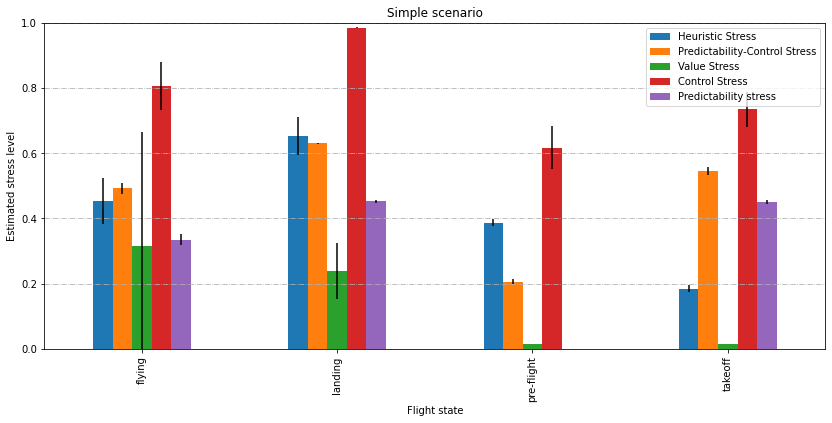

     Heuristic Stress  Predictability-Control Stress  Value Stress  \
0           -1.000000                      -1.000000     -1.000000   
1            0.330294                       0.147704      0.014338   
2            0.211670                       0.564146      0.016435   
3            0.322137                       0.496714      0.016565   
4            0.286642                       0.530739      0.016420   
..                ...                            ...           ...   
300          0.136364                       0.457309      0.014746   
301          0.438773                       0.424707      0.000000   
302          0.304214                       0.478386      0.000000   
303          0.493349                       0.507608      0.000000   
304          0.665420                       0.608326      0.000000   

     Control Stress  Predictability stress  state_name  
0         -1.000000              -1.000000   preflight  
1          0.443113               0.000000  p

In [11]:
df = plot_scenario_data(df_scen1, name="Simple scenario")
#df2 = plot_scenario_data(df_scen1_b)
print(df)

In [289]:
#df = plot_scenario_data(df_scen1_b, name="Simple scenario, test with updated data for blue")
#print(df)
# -> no difference

<Figure size 1296x648 with 0 Axes>

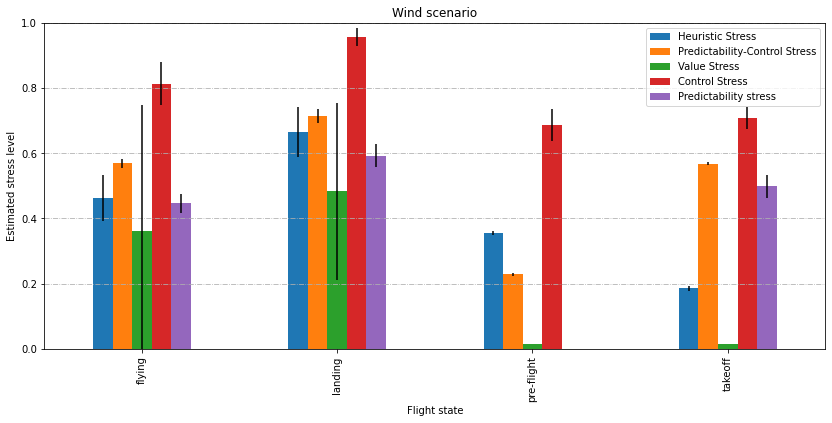

     Heuristic Stress  Predictability-Control Stress  Value Stress  \
0           -1.000000                      -1.000000     -1.000000   
1            0.397858                       0.133408      0.014179   
2            0.233815                       0.534158      0.016935   
3            0.287056                       0.522688      0.015145   
4            0.303428                       0.564730      0.011609   
..                ...                            ...           ...   
394          0.411579                       0.748045      0.050227   
395          0.420716                       0.708973      0.764297   
396          0.463608                       0.478837      0.688342   
397          0.846143                       0.673810      0.749048   
398          0.782449                       0.745936      0.808451   

     Control Stress  Predictability stress  state_name  
0         -1.000000              -1.000000   preflight  
1          0.400225               0.000000  p

In [12]:
df = plot_scenario_data(df_scen2, name="Wind scenario")
print(df)

<Figure size 1296x648 with 0 Axes>

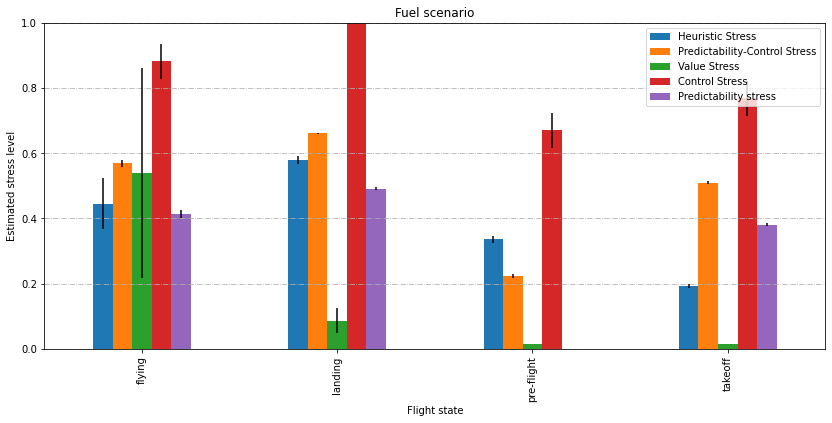

     Heuristic Stress  Predictability-Control Stress  Value Stress  \
0           -1.000000                      -1.000000     -1.000000   
1            0.397341                       0.137989      0.013992   
2            0.149165                       0.511552      0.016126   
3            0.296931                       0.522887      0.030704   
4            0.136364                       0.570289      0.071838   
..                ...                            ...           ...   
235          0.519902                       0.683423      0.981986   
236          0.487474                       0.565441      0.984626   
237          0.560714                       0.545758      0.993809   
238          0.608415                       0.487524      0.997776   
239          0.765043                       0.513412      0.999346   

     Control Stress  Predictability stress  state_name  
0         -1.000000              -1.000000   preflight  
1          0.413967               0.000000  p

In [13]:
df = plot_scenario_data(df_scen3, name="Fuel scenario")
print(df)

<Figure size 1296x648 with 0 Axes>

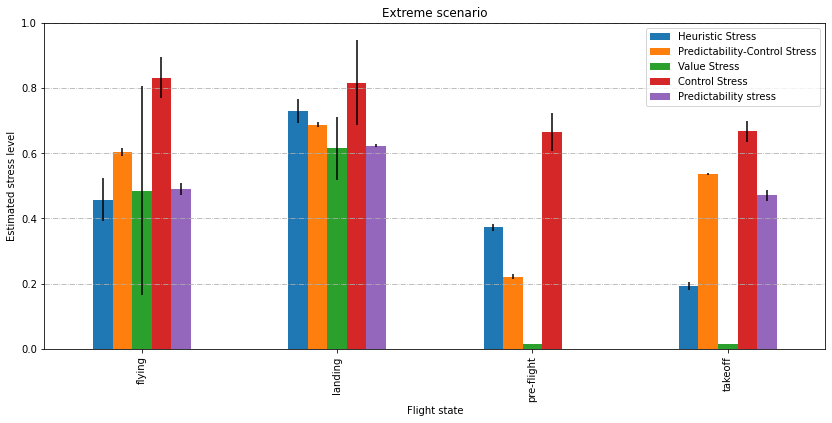

     Heuristic Stress  Predictability-Control Stress  Value Stress  \
0           -1.000000                      -1.000000     -1.000000   
1            0.421645                       0.132603      0.013942   
2            0.246890                       0.518712      0.015501   
3            0.312684                       0.513509      0.014187   
4            0.252303                       0.534095      0.023796   
..                ...                            ...           ...   
238          0.402888                       0.673032      0.745482   
239          0.616696                       0.612278      0.951664   
240          0.646489                       0.472154      0.938579   
241          0.822461                       0.718078      0.964910   
242          0.777871                       0.743487      0.680133   

     Control Stress  Predictability stress  state_name  
0         -1.000000              -1.000000   preflight  
1          0.397809               0.000000  p

In [14]:
df = plot_scenario_data(df_scen4, name="Extreme scenario")
print(df)